## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Telecom Churn Case Study Hackathon-C69</span>

### <span style=" font-family:'abadi';font-style:italic;">Build a machine learning model to predict customer churn in the telecom industry to improve retention.</span>

* <span style=" font-family:'abadi';font-style:italic;">Predict which telecom customers are at high risk of churning.</span>
* <span style=" font-family:'abadi';font-style:italic;">Enable proactive measures to retain valuable customers.</span>

## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Business Goal</span>

### <span style=" font-family:'abadi';font-style:italic;">Model the demand to manipulate the business strategy to understand the dynamics of a new market.</span>

* <span style=" font-family:'abadi';font-style:italic;"> The goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.</span>

## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Problem Statement</span>

* <span style=" font-family:'abadi';font-style:italic;"> The telecom industry faces high customer churn (15-25% annually) in a competitive market, making customer retention crucial due to the high cost of acquiring new customers.
* <span style=" font-family:'abadi';font-style:italic;"> Telecom companies aim to predict and prevent churn of profitable customers using machine learning models based on customer usage data.
* <span style=" font-family:'abadi';font-style:italic;"> The goal of the project is to build a machine learning model that can accurately predict which customers will churn.</span>

### <span style="color:blue; font-weight : bold; font-family:'Calibri';">Importing Libraries, Reading Data</span>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
pd.set_option("display.max_columns",300)
pd.set_option('display.max_rows',300)

In [7]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample.csv")
data_dict=pd.read_csv("data_dictionary.csv")

In [8]:
print("train.shape:", train.shape)
print("test.shape:", test.shape)
print("sample.shape:", sample.shape)
print("data.dict", data_dict.shape)

train.shape: (69999, 172)
test.shape: (30000, 171)
sample.shape: (30000, 2)
data.dict (36, 2)


In [9]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [10]:
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


In [12]:
#listing unique value columns
unique_value=[]
for col in train.columns:
    if train[col].nunique()==1:
        unique_value.append(col)
print(unique_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [13]:
#drop unique value columns
train.drop(unique_value,axis=1,inplace=True)

In [14]:
test.drop(unique_value,axis=1,inplace=True)

In [15]:
train.drop('id',axis=1,inplace=True)

In [16]:
date_columns=['date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
          ]
category_columns=['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
         ]
numeric_columns=[col for col in train.columns if col not in date_columns+category_columns]

In [17]:
train.drop(columns=date_columns,axis=1,inplace=True)
test.drop(columns=date_columns,axis=1,inplace=True)

In [18]:
#missing value train data set
missing_value_train=round(100*(train.isna().sum(axis=0)/train.shape[0]),2)
missing_value_train[missing_value_train>70].sort_values(ascending=False)

total_rech_data_6     74.90
arpu_3g_6             74.90
max_rech_data_6       74.90
fb_user_6             74.90
count_rech_2g_6       74.90
night_pck_user_6      74.90
count_rech_3g_6       74.90
arpu_2g_6             74.90
av_rech_amt_data_6    74.90
fb_user_7             74.48
night_pck_user_7      74.48
arpu_2g_7             74.48
arpu_3g_7             74.48
av_rech_amt_data_7    74.48
total_rech_data_7     74.48
count_rech_3g_7       74.48
count_rech_2g_7       74.48
max_rech_data_7       74.48
av_rech_amt_data_8    73.69
count_rech_3g_8       73.69
arpu_3g_8             73.69
count_rech_2g_8       73.69
arpu_2g_8             73.69
max_rech_data_8       73.69
night_pck_user_8      73.69
total_rech_data_8     73.69
fb_user_8             73.69
dtype: float64

In [19]:
#consolidate the recharge columns
rech_columns=train.columns[train.columns.str.contains('_rech_')]
print(rech_columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


In [20]:
#find and replace the null value
train[rech_columns]=train[rech_columns].fillna(0)
print(train[rech_columns].isnull().sum()*100/train.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [21]:
#find and replace the null value
test[rech_columns]=test[rech_columns].fillna(0)
print(test[rech_columns].isnull().sum()*100/test.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [22]:
#average revenue/user
arpu_columns=train.columns[train.columns.str.contains('arpu_')]
print(arpu_columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')


In [23]:
#find and replace the null value
train[arpu_columns]=train[arpu_columns].fillna(0)
print(train[arpu_columns].isnull().sum()*100/train.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [24]:
#find and replace the null value
test[arpu_columns]=test[arpu_columns].fillna(0)
print(test[arpu_columns].isnull().sum()*100/test.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [25]:
#category columns
train[category_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  17568 non-null  float64
 1   night_pck_user_7  17865 non-null  float64
 2   night_pck_user_8  18417 non-null  float64
 3   fb_user_6         17568 non-null  float64
 4   fb_user_7         17865 non-null  float64
 5   fb_user_8         18417 non-null  float64
dtypes: float64(6)
memory usage: 3.2 MB


In [26]:
#find and replace the null value
train[category_columns]=train[category_columns].fillna(-1).astype('category')
print(train[category_columns].isnull().sum()*100/train.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [27]:
train[category_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  69999 non-null  category
 1   night_pck_user_7  69999 non-null  category
 2   night_pck_user_8  69999 non-null  category
 3   fb_user_6         69999 non-null  category
 4   fb_user_7         69999 non-null  category
 5   fb_user_8         69999 non-null  category
dtypes: category(6)
memory usage: 411.1 KB


In [28]:
test[category_columns]=test[category_columns].fillna(-1).astype('category')
print(test[category_columns].isnull().sum()*100/test.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [29]:
test[category_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  30000 non-null  category
 1   night_pck_user_7  30000 non-null  category
 2   night_pck_user_8  30000 non-null  category
 3   fb_user_6         30000 non-null  category
 4   fb_user_7         30000 non-null  category
 5   fb_user_8         30000 non-null  category
dtypes: category(6)
memory usage: 176.7 KB


In [30]:
#find the missing value
missing_value_train[(missing_value_train>0)&(missing_value_train<=70)].sort_values(ascending=False)

ic_others_8         5.29
loc_og_t2m_mou_8    5.29
std_og_mou_8        5.29
spl_og_mou_8        5.29
std_og_t2f_mou_8    5.29
og_others_8         5.29
std_og_t2m_mou_8    5.29
loc_ic_t2t_mou_8    5.29
std_og_t2t_mou_8    5.29
loc_ic_t2m_mou_8    5.29
loc_og_mou_8        5.29
loc_ic_t2f_mou_8    5.29
loc_og_t2c_mou_8    5.29
loc_ic_mou_8        5.29
isd_og_mou_8        5.29
std_ic_t2t_mou_8    5.29
loc_og_t2f_mou_8    5.29
std_ic_t2m_mou_8    5.29
spl_ic_mou_8        5.29
onnet_mou_8         5.29
loc_og_t2t_mou_8    5.29
std_ic_t2f_mou_8    5.29
isd_ic_mou_8        5.29
roam_og_mou_8       5.29
std_ic_mou_8        5.29
offnet_mou_8        5.29
roam_ic_mou_8       5.29
ic_others_6         3.95
og_others_6         3.95
loc_ic_t2t_mou_6    3.95
isd_ic_mou_6        3.95
spl_ic_mou_6        3.95
loc_ic_t2m_mou_6    3.95
std_ic_t2m_mou_6    3.95
loc_ic_t2f_mou_6    3.95
loc_ic_mou_6        3.95
std_ic_mou_6        3.95
std_ic_t2t_mou_6    3.95
std_ic_t2f_mou_6    3.95
spl_og_mou_6        3.95


In [31]:
#creating the list
missing_values_list=missing_value_train[(missing_value_train>0)&(missing_value_train<=70)].index

In [32]:
#recharge data column
train['total_rech_data_amt_6']=train['total_rech_data_6']*train['av_rech_amt_data_6']
train['total_rech_data_amt_7']=train['total_rech_data_7']*train['av_rech_amt_data_7']
train['total_amt_6']=train['total_rech_data_amt_6']+train['total_rech_amt_6']
train['total_amt_7']=train['total_rech_data_amt_7']+train['total_rech_amt_7']
train['total_avg_amt_6_7']=train[['total_amt_6','total_amt_7']].mean(axis=1)

In [33]:
data_columns=['total_rech_data_amt_6','total_rech_data_amt_7','av_rech_amt_data_6','av_rech_amt_data_7',
                  'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8',]
train.drop(data_columns,axis=1,inplace=True)

In [34]:
test['total_rech_data_amt_6']=test['total_rech_data_6']*test['av_rech_amt_data_6']
test['total_rech_data_amt_7']=test['total_rech_data_7']*test['av_rech_amt_data_7']
test['total_amt_6']=test['total_rech_data_amt_6']+test['total_rech_amt_6']
test['total_amt_7']=test['total_rech_data_amt_7']+test['total_rech_amt_7']
test['total_avg_amt_6_7']=test[['total_amt_6','total_amt_7']].mean(axis=1)

In [35]:
#drop the data columns
test.drop(data_columns,axis=1,inplace=True)

In [36]:
#average amount with 70% quantile
avg_amount_70=train['total_avg_amt_6_7'].quantile(0.7)
avg_amount_70

477.5

In [37]:
#high value customer
high_value_customer_train=train[(train['total_avg_amt_6_7']>avg_amount_70)].copy()
print(high_value_customer_train.shape)

(20998, 149)


In [38]:
#churn probability and high value customer. change the data type
high_value_customer_train['churn_probability'].dtype

dtype('int64')

In [39]:
high_value_customer_train['churn_probability']=high_value_customer_train['churn_probability'].astype('category')

In [40]:
high_value_customer_train['churn_probability'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [41]:
#churn probability and churn ratio
print(high_value_customer_train['churn_probability'].value_counts())
print('churn-ratio:')
print(high_value_customer_train['churn_probability'].value_counts()*100/high_value_customer_train.shape[0])

churn_probability
0    19263
1     1735
Name: count, dtype: int64
churn-ratio:
churn_probability
0    91.737308
1     8.262692
Name: count, dtype: float64


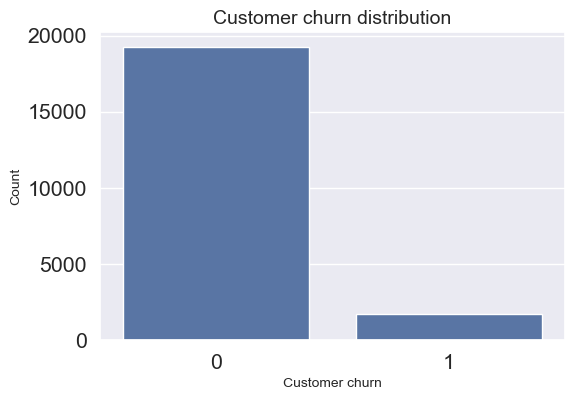

In [307]:
#bar plot for churn customer
plt.figure(figsize=(6, 4))
sns.countplot(x=high_value_customer_train['churn_probability'])
plt.xlabel('Customer churn',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Customer churn distribution',fontsize=14)
plt.show()

In [43]:
#churn data
churn_data=high_value_customer_train.copy()
churn_data.reset_index(inplace=True)
churn_data.drop(['index'],axis=1,inplace=True)

In [44]:
#check the churn data shape
churn_data.shape

(20998, 149)

In [45]:
#missing value imputing
missing_value=round(100*(churn_data.isnull().sum(axis=0)/churn_data.shape[0]), 2)
s=missing_value.loc[missing_value>0]
impute_columns_number=list(s.index)
len(impute_columns_number)

81

In [46]:
#drop the high value customer
drop=high_value_customer_train.dropna()
print(churn_data.shape[0]-drop.shape[0])

1061


In [47]:
#imputer
imputer=KNNImputer(n_neighbors=5)

In [48]:
#impute column number
df_num=churn_data[impute_columns_number]
churn_df=churn_data.drop(impute_columns_number,axis=1)

In [49]:
df_imp=imputer.fit_transform(df_num)

In [50]:
df_imp=pd.DataFrame(df_imp,columns=impute_columns_number)
df_imp.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4
3,93.18,38.29,29.86,531.19,507.76,222.03,0.00,0.0,0.0,0.00,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.00,0.36,252.48,257.74,129.73,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,52.49,37.84,19.14,170.61,106.71,150.73,0.00,1.53,1.13,223.11,146.09,171.01,0.0,0.0,0.0,6.96,9.54,21.93,0.00,0.00,0.0,6.96,9.54,21.93,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,8.58,11.48,12.68,133.16,158.73,182.83,0.00,0.0,0.0,0.00,0.0,0.0,8.58,11.48,12.68,96.91,149.44,157.23,33.71,9.28,25.59,0.0,0.00,0.00,139.21,170.21,195.51,0.0,0.0,0.0,2.53,0.00,0.00,0.0,0.0,0.00,2.53,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,51.74,83.83,82.81,129.01,214.49,159.69,87.28,67.69,107.94,268.04,366.03,350.46,0.0,0.0,0.4,0.00,0.00,0.00,15.43,0.00,0.0,15.43,0.00,0.40,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [51]:
#final dataframe
final_df=pd.concat([df_imp,churn_df],join='inner',axis=1)
final_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_avg_amt_6_7
0,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,13,10,8,290,136,122,50,41,30,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1515.0,1473.0,1494.0
1,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,5,3,4,654,400,652,250,250,250,0,150,250,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.0,0.00,0.00,0,808.0,400.0,604.0
2,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,1130.948,905.506,479.762,11

In [52]:
#check the sum of null values
final_df.isnull().sum().sort_values(ascending=False)

onnet_mou_6           0
total_rech_amt_7      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
total_rech_amt_8      0
total_rech_amt_6      0
isd_ic_mou_6          0
total_rech_num_8      0
isd_ic_mou_8          0
ic_others_6           0
ic_others_7           0
ic_others_8           0
arpu_6                0
arpu_7                0
arpu_8                0
total_og_mou_6        0
total_og_mou_7        0
total_og_mou_8        0
total_ic_mou_6        0
total_ic_mou_7        0
total_ic_mou_8        0
total_rech_num_6      0
total_rech_num_7      0
vol_2g_mb_6           0
vol_2g_mb_7           0
vol_2g_mb_8           0
vol_3g_mb_6           0
monthly_3g_7          0
monthly_3g_8    

In [53]:
df_num_test=test[impute_columns_number]
churn_df_test=test.drop(impute_columns_number, axis=1)

In [54]:
df_imp_test=imputer.transform(df_num_test)

In [55]:
df_imp_test=pd.DataFrame(df_imp_test,columns=impute_columns_number)
df_imp_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.0,0.00
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.0,0.00,0.00,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,509.03,629.43,749.29,0.0,0.0,0.0,0.71,5.39,4.96,2.2,0.0,0.0,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00,10.13,9.59,17.61,29.71,92.36,107.39,13.88,13.96,32.46,0.0,0.0,1.61,43.59,106.33,141.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.16


In [56]:
df_imp_test=pd.DataFrame(df_imp_test,columns=impute_columns_number)
df_imp_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.0,0.00
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.0,0.00,0.00,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,509.03,629.43,749.29,0.0,0.0,0.0,0.71,5.39,4.96,2.2,0.0,0.0,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00,10.13,9.59,17.61,29.71,92.36,107.39,13.88,13.96,32.46,0.0,0.0,1.61,43.59,106.33,141.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.16


In [57]:
#test dataset final
final_test_df=pd.concat([df_imp_test, churn_df_test], join='inner', axis=1)
final_test_df.head()
final_test_df.shape

(30000, 149)

In [58]:
#sum of null value in the test dataset
final_test_df.isnull().sum().sort_values(ascending=False)

onnet_mou_6           0
total_rech_amt_6      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
total_rech_amt_7      0
total_rech_num_8      0
isd_ic_mou_6          0
total_rech_num_7      0
isd_ic_mou_8          0
ic_others_6           0
ic_others_7           0
ic_others_8           0
id                    0
arpu_6                0
arpu_7                0
arpu_8                0
total_og_mou_6        0
total_og_mou_7        0
total_og_mou_8        0
total_ic_mou_6        0
total_ic_mou_7        0
total_ic_mou_8        0
total_rech_num_6      0
count_rech_3g_8       0
vol_2g_mb_6           0
vol_2g_mb_7           0
vol_2g_mb_8           0
monthly_3g_6          0
monthly_3g_7    

In [290]:
def bar_plots(title,month,y_list,data):
    """bar graph with title month y-variable name and data"""
    plt.figure(figsize=(12, 8))
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability',y=y_list[i],data=data)
    plt.tight_layout()
    plt.show()

In [60]:
def outlier_handle(dataframe):
    """outlier handling"""
    transformed_values=[]
    for value in dataframe:
        if value<=0:
            transformed_values.append(float(0))
        elif float(value)==float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))
    return transformed_values

In [61]:
def classification_metrics(y_true, y_pred):
    """classification metrics for parameter y_true, y_pred"""
    # Confusion matrix
    cm=confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    # True Positives, False Positives, True Negatives, False Negatives
    TP=cm[1,1]
    FP=cm[0,1]
    TN=cm[0,0]
    FN=cm[1,0]
    # Accuracy Score
    accuracy=round((TP+TN)/(TP+FP+TN+FN),4)
    # Sensitivity (Recall or True Positive Rate)
    sensitivity=round(TP/(TP+FN),4)
    # Specificity
    specificity=round(TN/(TN +FP), 4)
    # Precision
    precision=round(TP/(TP+FP),4)
    # False Positive Rate
    false_positive_rate=round(FP/(FP+TN),4)
    # True Positive Rate
    true_positive_rate=sensitivity
    metrics_df=pd.DataFrame({
        'Metric':['Accuracy','Sensitivity','Specificity','Precision','False Positive Rate','True Positive Rate'],
        'Value':[accuracy,sensitivity,specificity,precision,false_positive_rate,true_positive_rate]
    })
    return metrics_df

In [313]:
def roc_graphs(actual, probs):
    fpr,tpr,thresholds=roc_curve(actual,probs,drop_intermediate=False)
    auc_score=roc_auc_score(actual,probs)
    plt.figure(figsize=(4,4))
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

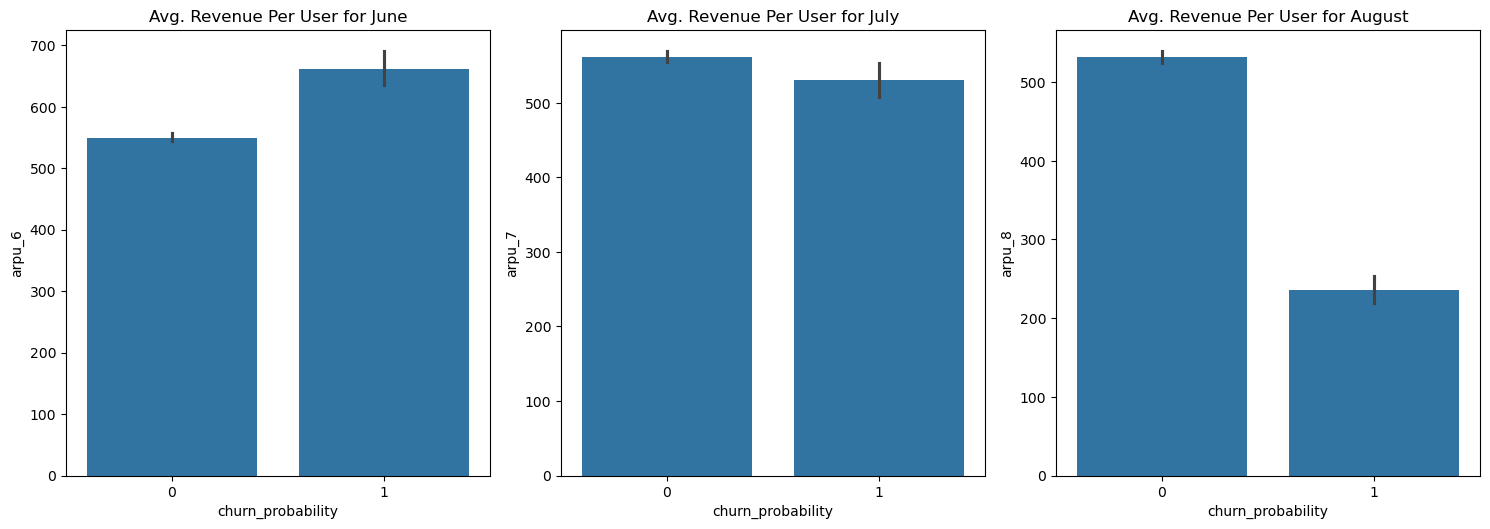

In [63]:
arpu_columns=['arpu_6','arpu_7','arpu_8']
bar_plots('Avg. Revenue Per User',['June','July','August'],arpu_columns,final_df)

In [64]:
amount_data=final_df.loc[:, final_df.columns.str.contains('amt')]
data2g=final_df.loc[:, final_df.columns.str.contains('2g')]
data3g=final_df.loc[:, final_df.columns.str.contains('3g')]
ic_mou_data=final_df.loc[:, final_df.columns.str.contains('ic')&final_df.columns.str.contains('mou')]
net_mou_data=final_df.loc[:, final_df.columns.str.contains('net_mou')]
og_mou_data=final_df.loc[:, final_df.columns.str.contains('og')&final_df.columns.str.contains('mou')]
rech_data=final_df.loc[:, final_df.columns.str.contains('rech')]
total_data=final_df.loc[:, final_df.columns.str.contains('tot')]

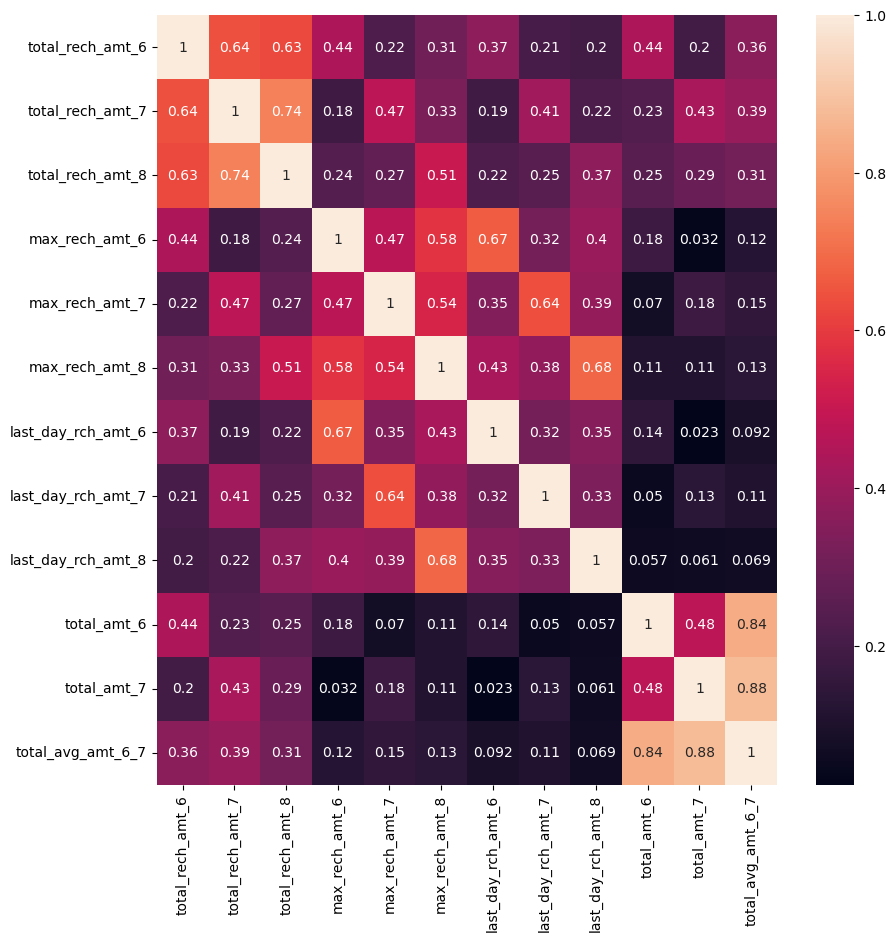

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(amount_data.corr(),annot=True)
plt.show()

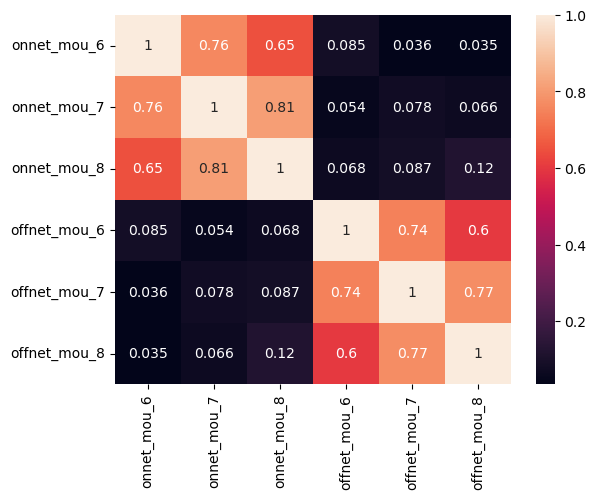

In [66]:
sns.heatmap(net_mou_data.corr(),annot=True)
plt.show()

In [67]:
final_df.shape

(20998, 149)

In [68]:
final_test_df.shape

(30000, 149)

In [69]:
#dummy columns creation
dummy_df=pd.get_dummies(final_df[['night_pck_user_8','fb_user_8','fb_user_7','fb_user_6','night_pck_user_7','night_pck_user_6']],drop_first=True,dtype='int')

In [70]:
final_df=pd.concat([final_df,dummy_df],axis=1)

In [71]:
#drop the columns
final_df.drop(['night_pck_user_8','fb_user_8','fb_user_7','fb_user_6','night_pck_user_7','night_pck_user_6'],axis=1,inplace=True)

In [72]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20998 entries, 0 to 20997
Columns: 155 entries, onnet_mou_6 to night_pck_user_6_1.0
dtypes: category(1), float64(117), int64(37)
memory usage: 24.7 MB


In [73]:
#dummy test dataframe
dummy_test_df=pd.get_dummies(final_test_df[['night_pck_user_8','fb_user_8','fb_user_7','fb_user_6','night_pck_user_7','night_pck_user_6']],drop_first=True,dtype='int')

In [74]:
final_test_df=pd.concat([final_test_df, dummy_test_df],axis=1)

In [75]:
#drop the test dataset columns 
final_test_df.drop(['night_pck_user_8','fb_user_8','fb_user_7','fb_user_6','night_pck_user_7','night_pck_user_6'],axis=1,inplace=True)

In [76]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 155 entries, onnet_mou_6 to night_pck_user_6_1.0
dtypes: float64(117), int64(38)
memory usage: 35.5 MB


In [77]:
#calculate percentiles 
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.00000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,209

In [78]:
#numeric columns list
numeric_columns=list(final_df.select_dtypes(exclude='category'))
numeric_columns

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [79]:
final_df[numeric_columns]=final_df[numeric_columns].apply(outlier_handle)

In [80]:
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20

In [81]:
final_test_df[numeric_columns]=final_test_df[numeric_columns].apply(outlier_handle)

In [82]:
final_test_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000

In [83]:
#model building
X=final_df.drop(['churn_probability'],axis=1)
y=final_df['churn_probability']

In [84]:
X.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
0,3.103689,1.763017,1.964311,4.060271,3.666378,2.363680,4.000766,0.0,0.0,2.817204,0.0,0.0,2.412336,1.763017,1.964311,3.630721,3.038792,1.724551,2.564180,0.802002,1.793425,0.0,2.384165,0.000000,4.092843,3.293612,2.818995,0.0,0.0,0.0,1.677097,0.000000,0.000000,0.0,0.0,0.00000,1.677097,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.890372,0.000000,0.00000,0.0,0.0,1.862529,0.871293,1.297463,2.449279,1.673351,3.019937,1.873339,1.532557,1.965713,3.115292,2.337952,3.377929,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.487730,4.861292,4.630497,4.162937,3.782825,2.818995,3.115292,2.337952,3.377929,2.639057,2.397895,2.197225,5.673323,4.919981,4.812184,3.931826,3.737670,3.433987,3.258097,2.397895,3.433987,3.258097,3.737670,3.258097,2.079442,1.945910,1.94591,0.0,1.5,0.000000,5.970752,5.736217,5.368170,0.000000,0.000000,0.000000,0.000000,3.583519,0.000000,0.000000,3.586847,0.000000,0.0,0.0,0.0,2.079442,1.945910,1.94591,0.0,0.0,0.0,0.0,1.5,0.0,6.473891,0.000000,0.000000,0.000000,7.323831,7.295735,7.309881,1.5,0.0,0.0,1.5,0.0,1.5,0.0,1.5,1.5,0.0,1.5,0.0
1,2.436241,3.257712,5.275202,5.762397,5.837118,5.288721,0.000000,0.0,0.0,0.000000,0.0,0.0,2.436241,3.257712,5.275202,5.751810,5.804773,5.230467,1.449269,2.477378,1.781709,0.0,0.000000,0.000000,5.794415,5.907512,5.956511,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.98238,0.000000,0.000000,1.982380,0.0,0.0,0.0,0.076961,0.000000,0.000000,0.09531,0.0,0.0,2.698673,3.053057,5.818390,5.395036,6.627036,5.658192,0.000000,1.075002,2.290513,5.456090,6.655904,6.447211,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.708036,0.0,0.000000,0.708036,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6.365

In [85]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=100)

In [86]:
print("X_train.shape:",X_train.shape)
print("y_train.shape:",y_train.shape)
print("X_validation.shape:",X_val.shape)
print("y_validation.shape:",y_val.shape)

X_train.shape: (16798, 154)
y_train.shape: (16798,)
X_validation.shape: (4200, 154)
y_validation.shape: (4200,)


In [87]:
y_train.value_counts()

churn_probability
0    15400
1     1398
Name: count, dtype: int64

In [88]:
smt=SMOTE(random_state=2)
X_train_smote,y_train_smote=smt.fit_resample(X_train, y_train)

In [89]:
X_train_smote.shape

(30800, 154)

In [90]:
y_train_smote.shape

(30800,)

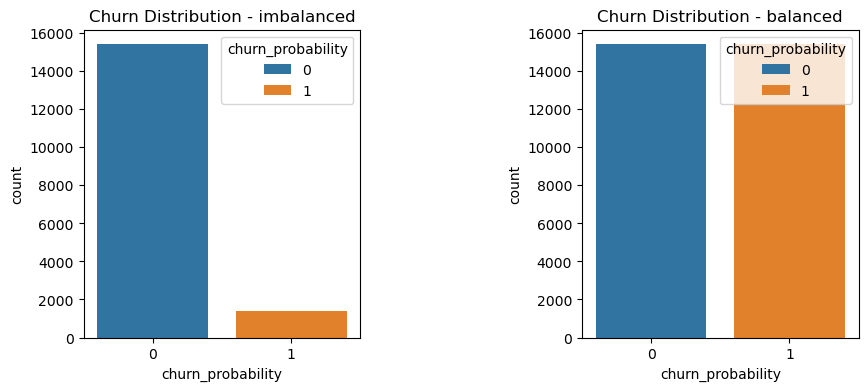

In [91]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Churn Distribution - imbalanced")
sns.countplot(x=y_train,hue=y_train)
plt.subplot(1,2,2)
plt.title("Churn Distribution - balanced")
sns.countplot(x=y_train_smote,hue=y_train_smote)
plt.subplots_adjust(wspace=0.8)
plt.show()

In [92]:
#standard scaler for the train and validation dataframe
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train_smote),columns=X_train_smote.columns,index=X_train_smote.index)
X_val_scaled =pd.DataFrame(scaler.transform(X_val),columns=X_val.columns,index=X_val.index)

In [93]:
X_train_scaled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
0,0.149095,0.096308,0.612510,-0.131921,-0.127237,0.241261,2.442333,-0.530509,2.266093,2.179345,-0.570207,2.091586,0.273358,0.528090,0.444381,-0.221222,0.327533,0.122709,-0.523643,0.030749,-0.702000,2.646044,-0.431061,-0.561881,-0.095626,0.327006,0.199787,-0.004909,0.369364,0.763584,0.050382,0.250152,0.324024,-0.357822,-0.35426,-0.361356,-0.081116,0.188767,0.459010,-0.272011,-0.264311,-0.292629,1.101211,-0.873129,-0.905436,-0.558256,-0.06942,-0.069571,0.458697,0.046132,0.421807,0.247691,0.560096,0.145849,1.188196,1.764876,1.454569,0.292820,0.514739,0.315157,-0.283659,-0.892688,-0.142172,1.092193,1.167800,1.120833,-0.457932,-0.443705,-0.464022,0.756696,0.807584,0.807532,-0.484935,-0.228913,-0.266206,1.140933,-0.496801,-0.519827,-0.418317,1.177179,-0.410687,0.132831,-0.812957,0.840747,-0.261388,0.088567,0.416751,0.360060,0.527999,0.571604,-1.012780,-1.434322,-0.619858,0.797311,-3.645013,0.423521,2.113502,-3.456901,0.941732,-2.284945,-1.712741,1.480695,1.432719,-0.910259,1.828966,1.201118,-0.717828,1.558462,-0.56377,-0.514079,-0.418627,-0.299683,-0.728585,0.727420,1.186961,-0.62621,1.485959,-0.618643,-0.574980,1.819061,0.107952,-0.642794,-0.411719,3.003533,-0.364041,3.479812,-0.610222,-0.589653,-0.495928,-0.43153,-0.39249,-0.33334,-0.35244,-0.326558,-0.251215,1.084328,1.461806,0.673010,1.072196,0.599767,-3.755230,-0.262654,1.363391,-0.087487,-0.246405,1.498577,-0.209151,-0.882333,-0.208259,1.083555,-0.936624,-0.109314,1.043735,-0.133862
1,-0.011493,0.097476,0.221889,-0.168737,-0.384978,0.112302,0.953740,-0.530509,1.403829,1.516742,-0.570207,0.612709,0.120880,0.772324,0.746190,0.251779,0.058033,0.397475,2.131453,0.957389,0.526302,-0.523327,-0.553555,2.426370,0.265492,0.314291,0.473698,0.278301,-0.011331,0.247915,-0.288979,0.091731,0.23982

In [94]:
final_test_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
0,3.489819,3.055415,3.182627,4.113493,3.501344,3.578786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.253470,3.055415,3.093766,2.951258,2.475698,2.236445,0.000000,2.679651,0.00000,0.0,0.000000,0.029559,3.784417,3.822317,3.415429,2.066863,0.000000,1.115142,3.761898,2.161022,3.311637,0.0,0.0,0.0,3.910622,2.161022,3.383712,0.0,0.0,0.000000,0.000000,0.000000,0.029559,0.000000,0.0,0.0,3.444576,3.652215,3.134624,2.416806,1.720979,2.354228,0.231112,0.000000,0.000000,3.733136,3.764914,3.481548,0.000000,0.000000,0.000000,0.307485,0.712950,1.675226,0.0,0.0,0.00000,0.307485,0.712950,1.675226,0.431782,0.29267,0.329304,0.000000,0.000000,0.000000,0.0,0.0,0.00000,69999,4.531330,4.194642,4.181210,4.531954,3.977623,4.076520,3.754901,3.796837,3.617920,1.791759,1.791759,1.609438,4.644391,4.510860,4.110874,3.931826,3.433987,3.433987,3.433987,3.433987,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.434257,0.00000,0.000000,0.000000,4.644391,4.510860,4.579852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.337421,3.742657,3.036874,6.164030,6.434290,5.981263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.337421,3.742657,3.036874,6.162493,6.395395,5.935582,0.548121,0.000000,0.00000,0.0,0.000000,0.000000,6.311481,6.461921,5.986728,0.000000,0.000000,0.000000,0.000000,3.209229,2.927453,0.0,0.0,0.0,0.000000,3.209229,2.927453,0.0,0.0,0.587787,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.044046,3.330417,1.283708,5.082584,4.814539,5.224725,0.912283,0.000000,0.000000,5.207791,5.012234,5.238727,0.000000,0.000000,0.000000,0.000000,2.603430,0.000000,0.0,0.0,0.00000,0.000000,2.603430,0.000000,0.000000,0.00000,0.000000,4.750395,5.186715,4.556295,0.0,0

In [95]:
final_test_df.set_index('id',inplace=True)

### <span style="color:blue; font-weight : bold; font-family:'Calibri';">Logistic Regression - RFE</span>

In [96]:
#MODEL LR - RFE select top 20 features using RFE
logreg=LogisticRegression(max_iter=1000,tol=0.001,solver='sag')
rfe=RFE(logreg, n_features_to_select=20)
rfe=rfe.fit(X_train_scaled, y_train_smote)

In [97]:
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('onnet_mou_6', False, 59),
 ('onnet_mou_7', False, 26),
 ('onnet_mou_8', False, 25),
 ('offnet_mou_6', False, 92),
 ('offnet_mou_7', False, 16),
 ('offnet_mou_8', False, 13),
 ('roam_ic_mou_6', False, 69),
 ('roam_ic_mou_7', False, 34),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 68),
 ('roam_og_mou_7', False, 28),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 94),
 ('loc_og_t2t_mou_7', False, 66),
 ('loc_og_t2t_mou_8', False, 74),
 ('loc_og_t2m_mou_6', False, 22),
 ('loc_og_t2m_mou_7', False, 36),
 ('loc_og_t2m_mou_8', False, 23),
 ('loc_og_t2f_mou_6', False, 119),
 ('loc_og_t2f_mou_7', False, 38),
 ('loc_og_t2f_mou_8', False, 37),
 ('loc_og_t2c_mou_6', False, 79),
 ('loc_og_t2c_mou_7', False, 129),
 ('loc_og_t2c_mou_8', False, 109),
 ('loc_og_mou_6', False, 21),
 ('loc_og_mou_7', False, 15),
 ('loc_og_mou_8', False, 14),
 ('std_og_t2t_mou_6', False, 32),
 ('std_og_t2t_mou_7', False, 27),
 ('std_og_t2t_mou_8', False, 24),
 ('std_og_t2m_mou_6', False, 33),
 ('s

In [98]:
rfe_select_feature=X_train_scaled.columns[rfe.support_]
rfe_select_feature

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'night_pck_user_8_0.0'],
      dtype='object')

In [99]:
X_train_scaled_final=X_train_scaled[rfe_select_feature]
logreg.fit(X_train_scaled_final, y_train_smote)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [100]:
y_train_smote_pred=logreg.predict(X_train_scaled_final)

In [101]:
classification_metrics(y_train_smote, y_train_smote_pred)

Confusion Matrix

[[13533  1867]
 [ 2540 12860]]


,Metric,Value
0,Accuracy,0.8569
1,Sensitivity,0.8351
2,Specificity,0.8788
3,Precision,0.8732
4,False Positive Rate,0.1212
5,True Positive Rate,0.8351


In [102]:
#RFE selected feature 
X_val_scaled_final=X_val_scaled[rfe_select_feature]
X_val_scaled_final.head()

,roam_ic_mou_8,roam_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_7,loc_ic_mou_8,spl_ic_mou_8,total_ic_mou_8,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,night_pck_user_8_0.0
3837,-0.665387,-0.710456,-0.630123,-0.290162,-1.557467,-0.780543,-1.260504,-0.619065,-0.266206,-0.300154,-1.082799,-0.101475,0.204074,0.547510,0.794832,0.902878,-1.039975,1.790895,-0.595224,1.363391
11055,-0.665387,-0.710456,-1.797890,-1.503512,-2.375165,-1.877598,-2.594405,-1.984776,2.474225,-1.317514,-1.434322,-0.619858,0.035264,0.561889,0.794832,0.902878,-1.039975,1.790895,-0.595224,1.363391
12221,-0.665387,-0.710456,-0.936447,0.500098,-1.291167,-0.008028,-1.288234,0.116256,6.933130,0.329095,0.159277,1.437791,-5.086412,0.669800,-4.510459,0.156583,0.724532,-0.735593,-0.595224,-0.759323
17179,0.507003,0.310656,-1.797890,-1.503512,-2.375165,-1.877598,-2.594405,-1.984776,-0.266206,-1.395256,0.159277,-0.101475,0.347429,-0.539241,0.004934,-0.256881,-1.039975,-0.735593,-0.595224,-0.759323
16047,-0.665387,-0.710456,1.009885,1.293738,0.136624,0.558736,0.498657,0.815104,-0.266206,0.859190,-1.887514,-0.987657,0.431105,-1.678770,1.078205,-1.675565,-1.039975,-0.735593,-0.595224,-0.759323


In [103]:
y_val_pred=logreg.predict(X_val_scaled_final)

In [104]:
confusion=confusion_matrix(y_true=y_val,y_pred=y_val_pred)
print(confusion)

[[3379  484]
 [  76  261]]


In [105]:
metrics_df=classification_metrics(y_true=y_val,y_pred=y_val_pred)
metrics_df

Confusion Matrix

[[3379  484]
 [  76  261]]


,Metric,Value
0,Accuracy,0.8667
1,Sensitivity,0.7745
2,Specificity,0.8747
3,Precision,0.3503
4,False Positive Rate,0.1253
5,True Positive Rate,0.7745


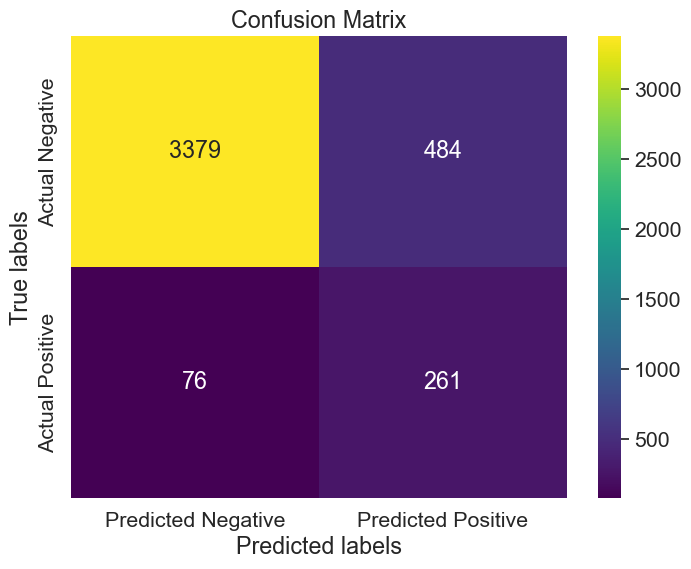

In [106]:
#confusion matrix
labels=['True Negative','False Positive','False Negative','True Positive']
#reshape the confusion matrix
cm_array = np.array(confusion).reshape(2,2)
#heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True,cmap='viridis',fmt='g',xticklabels=['Predicted Negative','Predicted Positive'],yticklabels=['Actual Negative','Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

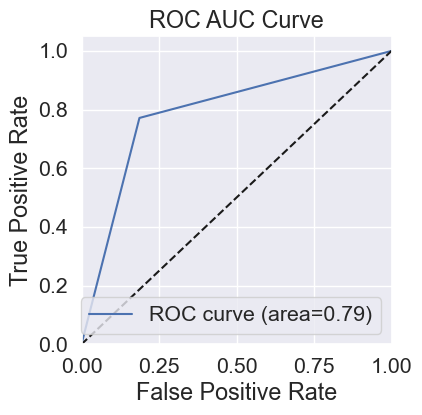

In [315]:
fpr,tpr,thresholds=roc_graphs(y_val, y_val_pred)

In [108]:
"{:2.2f}".format(roc_auc_score(y_val, y_val_pred))

'0.82'

### <span style="color:blue; font-weight : bold; font-family:'Calibri';">Logistic Regression - PCA</span>

In [109]:
#MODEL LR - PCA & Hyperparameter
pca=PCA()

In [110]:
pca_components=pca.fit_transform(X_train)
pca_components

array([[ 4.89135055e-01,  2.83721156e+00,  3.62021401e+00, ...,
        -3.06040225e-14,  6.56385049e-15,  2.27617618e-14],
       [ 6.47598780e+00, -4.59803150e+00, -1.14579551e+00, ...,
         6.55446254e-15, -1.42965857e-14, -1.08023213e-14],
       [ 1.19215807e+01, -4.15662423e+00,  2.45699559e+00, ...,
         1.90580264e-14,  3.23761033e-15,  6.37756996e-14],
       ...,
       [-3.92522050e+00,  3.86954317e+00, -2.86308492e-01, ...,
        -1.31845421e-14, -1.56867515e-14,  6.85490531e-14],
       [-1.23247013e+01, -8.91514399e-01, -1.74474951e+00, ...,
        -7.10683104e-15,  5.26858309e-15,  9.32004560e-14],
       [-2.52714922e+01, -4.94115360e+00,  6.79133427e+00, ...,
        -6.37004920e-14, -2.73174000e-14, -2.84949216e-13]])

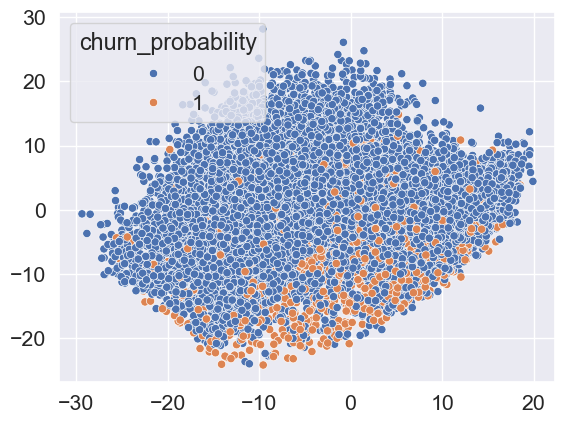

In [111]:
sns.scatterplot(x=pca_components[:,0],y=pca_components[:,1],hue=y_train)
plt.show()

In [112]:
X=high_value_customer_train.copy().drop(['churn_probability'],axis=1)
y=high_value_customer_train.copy()['churn_probability']

In [113]:
X_train,X_val,y_train,y_val=train_test_split(X, y,test_size=0.2,random_state=100)

In [114]:
imputer=SimpleImputer(strategy='constant',fill_value=0)
scaler=StandardScaler()
pca=PCA(n_components=20)
smote=SMOTE(random_state=2)
lr=LogisticRegression(max_iter=1000,tol=0.001,random_state=42)

In [115]:
pipe=make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    lr
)

In [116]:
param_grid={
    'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver':['liblinear','saga'],
}

In [117]:
lr_grid_search=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [118]:
lr_grid_search.fit(X_train, y_train)
#the best parameters and estimator
lr_best_params=lr_grid_search.best_params_
lr_best_estimator=lr_grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [119]:
y_train_pred=lr_grid_search.predict(X_train)

In [120]:
y_val_pred=lr_grid_search.predict(X_val)

In [121]:
#train set metrics
classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[12478  2922]
 [  277  1121]]


,Metric,Value
0,Accuracy,0.8096
1,Sensitivity,0.8019
2,Specificity,0.8103
3,Precision,0.2773
4,False Positive Rate,0.1897
5,True Positive Rate,0.8019


In [122]:
#validation set metrics
classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3141  722]
 [  77  260]]


,Metric,Value
0,Accuracy,0.8098
1,Sensitivity,0.7715
2,Specificity,0.8131
3,Precision,0.2648
4,False Positive Rate,0.1869
5,True Positive Rate,0.7715


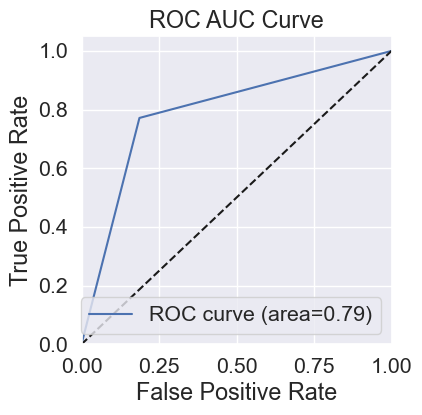

In [317]:
fpr,tpr,thresholds=roc_graphs(y_val,y_val_pred)

### <span style="color:blue; font-weight : bold; font-family:'Calibri';">Random forest classifier</span>

In [124]:
#MODEL Random Forest Classifier
rf=RandomForestClassifier(random_state=42)

In [125]:
pipe=make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    rf
)

In [126]:
param_grid={
    'randomforestclassifier__n_estimators':[100],  
    'randomforestclassifier__max_depth':[5,10],       
    'randomforestclassifier__min_samples_split':[2, 5, 10],
}

In [127]:
grid_search=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [128]:
#grid search fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=20)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [129]:
best_params=grid_search.best_params_
print("The best parameters:",best_params)
#the best model
best_model=grid_search.best_estimator_
#predict train set using the best model
y_train_pred=best_model.predict(X_train)
#predict train set using the validation model
y_test_pred=best_model.predict(X_val)

The best parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}


In [130]:
classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[13868  1532]
 [   84  1314]]


,Metric,Value
0,Accuracy,0.9038
1,Sensitivity,0.9399
2,Specificity,0.9005
3,Precision,0.4617
4,False Positive Rate,0.0995
5,True Positive Rate,0.9399


In [131]:
classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3141  722]
 [  77  260]]


,Metric,Value
0,Accuracy,0.8098
1,Sensitivity,0.7715
2,Specificity,0.8131
3,Precision,0.2648
4,False Positive Rate,0.1869
5,True Positive Rate,0.7715


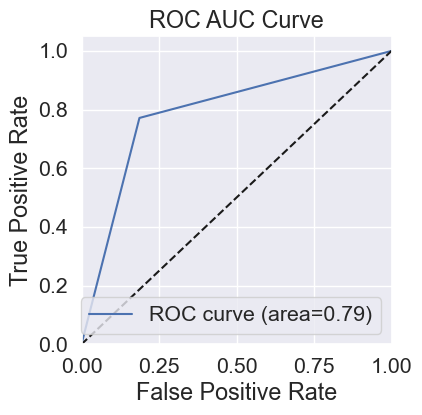

In [319]:
fpr,tpr,thresholds=roc_graphs(y_val,y_val_pred)

### <span style="color:blue; font-weight : bold; font-family:'Calibri';">XGBoost classifier</span>

In [133]:
#MODEL xgboost classifier
pipe=make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    XGBClassifier(random_state=42)
)

In [134]:
param_grid={
    'xgbclassifier__n_estimators':[100, 200, 300],  
    'xgbclassifier__max_depth':[3, 5, 7],
    'xgbclassifier__learning_rate':[0.01, 0.1, 0.3]
}

In [135]:
grid_search=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [136]:
#train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=20)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      d...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__learning_rate': [0.01, 0.1, 0.3],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [137]:
#the best parameters
best_params=grid_search.best_params_
print("The best parameters:", best_params)
#the best model
best_model=grid_search.best_estimator_
#predict train set using the best model
y_train_pred=best_model.predict(X_train)
#predict train set using the validation model
y_test_pred=best_model.predict(X_val)

The best parameters: {'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 300}


In [138]:
classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[15400     0]
 [    0  1398]]


,Metric,Value
0,Accuracy,1.0
1,Sensitivity,1.0
2,Specificity,1.0
3,Precision,1.0
4,False Positive Rate,0.0
5,True Positive Rate,1.0


In [139]:
#metrics on validation set
classification_metrics(y_val,y_val_pred)

Confusion Matrix

[[3141  722]
 [  77  260]]


,Metric,Value
0,Accuracy,0.8098
1,Sensitivity,0.7715
2,Specificity,0.8131
3,Precision,0.2648
4,False Positive Rate,0.1869
5,True Positive Rate,0.7715


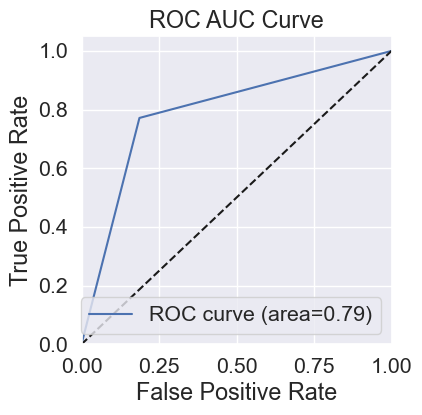

In [321]:
fpr,tpr,thresholds=roc_graphs(y_val, y_val_pred)

In [141]:
submission_data=final_test_df[rfe_select_feature]
submission_data.shape

(30000, 20)

In [142]:
final_test_df['churn_probability']=logreg.predict(submission_data)
output=final_test_df[['churn_probability']]
output.head()

,churn_probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0


In [143]:
output.to_csv('submission.csv',index=True)

## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Recommendation</span>

### <span style=" font-family:'abadi';font-style:italic;">Business recommendation to reduce the Churn by providing Promotional offers</span>

* <span style=" font-family:'abadi';font-style:italic;">Free calls across nation scheme</span>
* <span style=" font-family:'abadi';font-style:italic;">Provide special offers</span>
* <span style=" font-family:'abadi';font-style:italic;">OTT Subscription offers</span>
* <span style=" font-family:'abadi';font-style:italic;">Add-on card offers</span>